# 심장병 분류 문제 ( 딥러닝 )

## import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

## 데이터 전처리 및 스케일링

In [12]:
# 데이터 불러오기
file_path = "https://github.com/MyungKyuYi/AI-class/raw/main/heart.csv"
df = pd.read_csv(file_path)

# 결측치 확인
print(df.isnull().sum())
print("\n=====================================================\n")

# 레이블 불균형 여부를 위한 갯수 확인 (숫자)
print(df['target'].value_counts())
print("\n=====================================================\n")

# X와 Y 분할
X = df.drop('target', axis=1) # Feature
Y = df['target'] # Label

# One-Hot Encoding하면서 Numpy으로 변환
X = X.values # 문자열 데이터 없으므로 바로 numpy 변환
Y = pd.get_dummies(Y).values # label은 숫자 데이터여도 연관성을 끊어줘야 하기 때문에 반드시 인코딩.
print(X)
print(Y)

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분할된 데이터의 shape을 출력
print("\n=====================================================\n")
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape : ", Y_test.shape)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


target
1    165
0    138
Name: count, dtype: int64


[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[[False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [False  True]
 [Fa

## 딥러닝 훈련 및 예측

In [15]:
# 딥러닝
model = Sequential()

model.add(Dense(20,input_shape=(13,),activation='relu')) # 입력층 : 특성의 개수 13
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='sigmoid')) # 출력층 : 이진 분류이므로 뉴런 개수 2, 활성화 함수 sigmoid, loss function은 binary_crossentropy

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

model.summary() # 모델 구조 출력


model_history=model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.1) # validation_data = (X_test, Y_test)으로 하면 안됨.
# 테스트 데이터는 테스트할 때만 사용해야 됨. 따라서 훈련 데이터의 10%를 검증 데이터로 사용.

Y_pred = model.predict(X_test) # 예측. 각 클래스에 대한 확률 값을 예측한다.

C:\Users\plo55\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,162 (4.54 KB)

 Trainable params: 1,162 (4.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4706 - loss: 0.7013 - val_accuracy: 0.5200 - val_loss: 0.7099
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4962 - loss: 0.6757 - val_accuracy: 0.4800 - val_loss: 0.6791
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5893 - loss: 0.6574 - val_accuracy: 0.5600 - val_loss: 0.6532
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6453 - loss: 0.6396 - val_accuracy: 0.6400 - val_loss: 0.6282
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6963 - loss: 0.6156 - val_accuracy: 0.6800 - val_loss: 0.6045
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8069 - loss: 0.5773 - val_accuracy: 0.7200 - val_loss: 0.5786
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7986 - loss: 0.5483 - val_accuracy: 0.7200 - val_loss: 0.5534
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7799 - loss: 0.5598 - val_accuracy: 0.7200 - val_loss: 0.5272


# 딥러닝 성능 평가

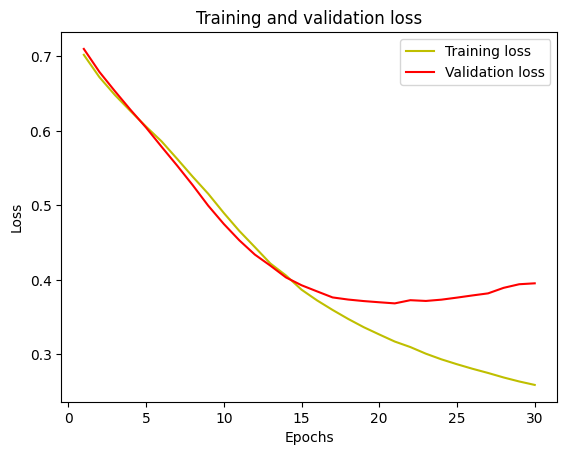

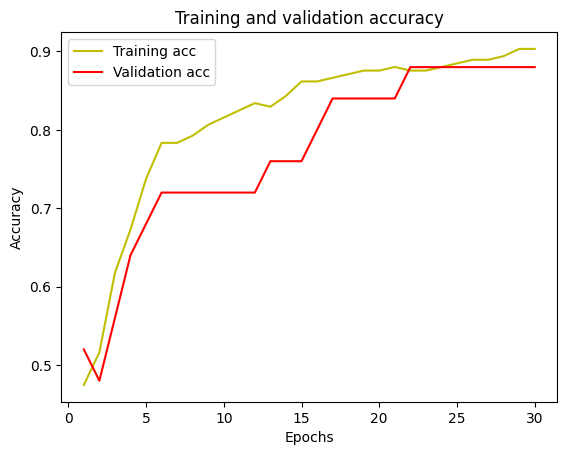



              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



[[24  5]
 [ 4 28]]


In [18]:
# 분류 문제에서 one-hot 인코딩된 데이터를 성능 평가에 쓰기 위해 다시 정수 라벨로 바꾸는 코드.
Y_test_class = np.argmax(Y_test,axis=1) # 실제 정답 클래스(정수 형태) ex) [0, 0, 1, 0] → 클래스 2 / [1, 0, 0, 0] → 클래스 0
Y_pred_class = np.argmax(Y_pred,axis=1) # 모델이 예측한 클래스(정수 형태) ex) [0.01, 0.02, 0.97] → 예측한 클래스: 2 / [0.8, 0.1, 0.1] → 예측한 클래스: 0 가장 확률이 높은 클래스의 인덱스로 변환.

# 에폭마다 훈련 손실과 검증 손실이 어떻게 달라지는지 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 에폭마다 훈련 정확도와 검증 정확도가 어떻게 달라지는지 시각화
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 성능 평가
print("\n=====================================================\n")
print(classification_report(Y_test_class, Y_pred_class))
print("\n=====================================================\n")
print(confusion_matrix(Y_test_class, Y_pred_class))